# Compute performance metrics for the given Y and Y_score without sklearn

In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
# other than these two you should not import any other packages


## A. Compute performance metrics for the given data '5_a.csv'
 <pre>  <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)
Note- Make sure that you arrange your probability scores in descending order while calculating AUC</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [2]:
df_a=np.loadtxt('5_a.csv',delimiter=',', dtype=str)
df_a=df_a[1:,:].astype('float64')
df_a=df_a[np.argsort(df_a[:,1])][::-1]
df_a#main Data

y_actual=df_a[:,0].copy()
y_proba=df_a[:,1].copy()
len(y_actual)

10100

In [3]:
from sklearn.metrics import confusion_matrix
y_pred=y_proba.copy()
y_proba[(y_proba>0.5)]=1
y_proba[(y_proba==0.5)]=1
y_proba[(y_proba<0.5)]=0

print(confusion_matrix(y_actual,y_proba))
y_proba

[[    0   100]
 [    0 10000]]


array([1., 1., 1., ..., 1., 1., 1.])

In [4]:
def confusion_matrix(y_actual,y_predicted):
    '''This function returns the confusion matrix
    '''
    TP=0
    FP=0
    TN=0
    FN=0
    for x in range(len(y_actual)):
        if y_actual[x]==1:
            if y_predicted[x]==1:
                TP+=1
            else:
                FN+=1
        if y_actual[x]==0:
            if y_predicted[x]==0:
                TN+=1
            else:
                FP+=1
    #print('TP={},FP={},TN={},FN={}'.format(TP,FP,TN,FN))
    return([TN,FN],[FP,TP])

X=confusion_matrix(y_actual,y_proba)#[TN,FN],[FP,TP]
print(X)

([0, 0], [100, 10000])


In [5]:
def precision(TP,FP):
    '''This function calculates the precision
    '''
    p=TP/(TP+FP)
    print('Precision',p)
    return p
def recall(TP,FN):
    '''This function calculates the recall
    '''
    r=TP/(TP+FN)
    print('Recall',r)
    return r

def f1_score(y_actual,y_predicted):
    '''This functions returns the f1 score
    '''
    cm=confusion_matrix(y_actual,y_predicted)
    TN,FN=cm[0]
    FP,TP=cm[1]
    p=precision(TP,FP)
    r=recall(TP,FN)
    f1=(2*p*r)/(p+r)
    print('f1_score',f1)
    return f1
f1_score(y_actual,y_proba)


Precision 0.9900990099009901
Recall 1.0
f1_score 0.9950248756218906


0.9950248756218906

In [6]:
def AUC(sorted_array1,prob_index,actual_y_index ):#pcolumn_name is a string with the name of the column with probabilities
    '''This function returns the AUC Score, tpr & fpr array
    '''
    tpr_array=[]
    fpr_array=[]
    proba=sorted_array1[:,prob_index].copy()
    for p in tqdm(proba):
        sorted_array=sorted_array1.copy()
        y_actual=sorted_array1[:,actual_y_index].copy()
        y_predicted=proba.copy()
        y_predicted[(y_predicted>p)]=1
        y_predicted[(y_predicted==p)]=1
        y_predicted[y_predicted<p]=0
        cm=confusion_matrix(y_actual,y_predicted)
        TN,FN=cm[0]
        FP,TP=cm[1]
        TPR=TP/(TP+FN)
        FPR=FP/(TN +FP)
        tpr_array.append(TPR)
        fpr_array.append(FPR)
    auc_score=np.trapz(tpr_array, fpr_array)
    return(auc_score,tpr_array,fpr_array)

sorted_df=df_a.copy()
a,tpr,fpr=AUC(sorted_df,1,0)
print('The AUC Score is ', a)

100%|████████████████████████████████████████████████████████████████████████████| 10100/10100 [01:58<00:00, 85.41it/s]

The AUC Score is  0.48829900000000004


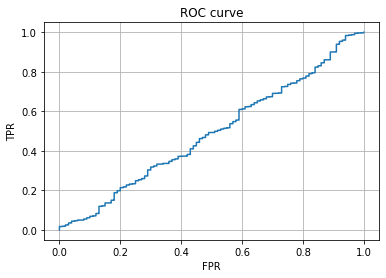

0.48829900000000004

In [7]:
import matplotlib.pyplot as plt
def plot(TPR, FPR):
    '''this function plot the ROC curve'''
    plt.plot(TPR,FPR)
    plt.title('ROC curve')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.grid(True)
    plt.show()

plot(fpr,tpr)
np.trapz(tpr, fpr)

In [8]:
def Accuracy_score(y_actual,y_predicted):
    correct=0
    wrong=0
    for x in range(len(y_actual)):
        
        if y_actual[x]==y_predicted[x]:
            correct+=1
        else:
            wrong+=1
    acc=correct/len(y_actual)
    return(acc)

Accuracy_score(y_actual,y_proba)

0.9900990099009901



## B. Compute performance metrics for the given data '5_b.csv'
<pre>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a>
Note- Make sure that you arrange your probability scores in descending order while calculating AUC</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [9]:
df_b=np.loadtxt('5_b.csv',delimiter=',', dtype=str)
df_b=df_b[1:,:].astype('float64')
df_b=df_b[np.argsort(df_b[:,1])][::-1]
df_b#main Data

y_actual=df_b[:,0].copy()
y_proba=df_b[:,1].copy()
len(y_actual)
y_proba

array([0.59529418, 0.5948084 , 0.59219787, ..., 0.10016508, 0.1001608 ,
       0.10000141])

In [10]:
y_predc=y_proba.copy()
y_predc[(y_predc>0.5)]=1
y_predc[(y_predc==0.5)]=1
y_predc[y_predc<0.5]=0

confusion_matrix(y_actual,y_predc)#[TN,FN],[FP,TP]

([9761, 45], [239, 55])

In [11]:
len(y_predc[y_predc==1])
len(y_actual[y_actual==1])

100

In [12]:
f1_score(y_actual,y_predc)

Precision 0.1870748299319728
Recall 0.55
f1_score 0.2791878172588833


0.2791878172588833

In [13]:
sorted_df=df_b.copy()
a,tpr,fpr=AUC(sorted_df,1,0)

100%|████████████████████████████████████████████████████████████████████████████| 10100/10100 [01:56<00:00, 86.51it/s]


AUC score is  0.9377570000000001


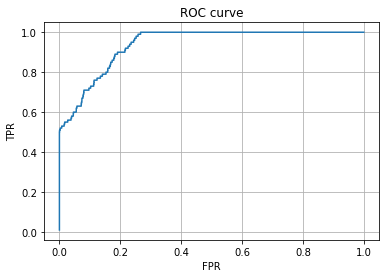

0.9377570000000001

In [14]:
print('AUC score is ', a)
plot(fpr,tpr)
np.trapz(tpr,fpr)

In [15]:
Accuracy_score(y_actual,y_predc)

0.9718811881188119

### C. Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data 
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [16]:
df_c=np.loadtxt('5_c.csv',delimiter=',',dtype=str)
df_c
df_c=df_c[1:,:].astype('float64')
df_c=df_c[np.argsort(df_c[:,1])][::-1]
df_c#Main Clean Data

array([[1.        , 0.9577468 ],
       [1.        , 0.95143692],
       [1.        , 0.94863779],
       ...,
       [0.        , 0.02896366],
       [0.        , 0.02839574],
       [0.        , 0.02803799]])

In [28]:
def best_threshold(sorted_array,prob_index,actual_y_index ):#pcolumn_name is a string with the name of the column with probabilities
    '''numpy code
    '''
    a_scores=[]
    p_values=[]
    proba1=sorted_array[:,prob_index].copy()
    for p in tqdm(proba1):
        proba=sorted_array[:,prob_index].copy()
        y_actual=sorted_array[:,actual_y_index].copy()
        y_predicted=proba.copy()
        y_predicted[y_predicted>p]=1
        y_predicted[y_predicted==p]=1
        y_predicted[y_predicted<p]=0
        cm=confusion_matrix(y_actual,y_predicted)
        TN,FN=cm[0]
        FP,TP=cm[1]
        A=(500*FN)+ (100*FP)
        a_scores.append(A)
        p_values.append(p)
    m=min(a_scores)
    i=a_scores.index(m)
    threshold=p_values[i]
    return(threshold)

df_c
df=df_c.copy()
best_threshold(df,1,0)

100%|█████████████████████████████████████████████████████████████████████████████| 2852/2852 [00:09<00:00, 302.52it/s]


0.2300390278970873

In [32]:
trial_df=df_c.copy()
trial_df[trial_df>0.2300390278970873]=1
trial_df[trial_df==0.2300390278970873]=1
trial_df[trial_df<0.2300390278970873]=0
y=trial_df[:,1]
x=trial_df[:,0]
confusion_matrix(x,y )#[TN,FN],[FP,TP]

([785, 78], [1020, 969])


## D.</b></font> Compute performance metrics(for regression) for the given data 5_d.csv
<pre>    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [33]:
df_d=np.loadtxt('5_d.csv',delimiter=',',dtype=str)
#print(df_d[:5,:])
df_d=df_d[1:,:].astype('float64')
y_actual=df_d[:,0].copy()
y_predicted=df_d[:,1].copy()
df_d#Main Cleaned Data

array([[101., 100.],
       [120., 100.],
       [131., 113.],
       ...,
       [106.,  93.],
       [105., 101.],
       [ 81., 104.]])

In [34]:
def mean_square_error(y_actual,y_predicted):
    square_error=[]
    for i in tqdm(range(len(y_actual))):
        e_i=(y_actual[i]-y_predicted[i])
        square_error.append(e_i**2)
    #print(sum(square_error))
    mean=np.mean(square_error)
    return(mean)
mean_square_error(y_actual,y_predicted)

100%|██████████████████████████████████████████████████████████████████████| 157200/157200 [00:00<00:00, 814990.70it/s]


177.16569974554707

In [89]:
def MAPE(y_actual,y_predicted):
    abs_error=[]
    for x in tqdm(range(len(y_actual))):
        e_i=abs(y_actual[x]-y_predicted[x])
        abs_error.append(e_i)
    s=sum(y_actual)
    MAPE=(sum(abs_error)/s)
    return(MAPE)

MAPE(y_actual,y_predicted)
    
    

100%|██████████████████████████████████████████████████████████████████████| 157200/157200 [00:00<00:00, 925240.08it/s]


0.1291202994009687

In [90]:
def r2_error(y_actual,y_predicted):
    ss_res=0
    ss_tot=0
    m=np.mean(y_actual)
    for i in range (len(y_actual)):
        e_i=(y_actual[i]-y_predicted[i])**2
        ss_res+=e_i
        x_i=(y_actual[i]-m)**2
        ss_tot+=x_i
    r2_error=1-(ss_res/ss_tot)
    return(r2_error)
r2_error(y_actual,y_predicted)

0.9563582786990964